In [1]:
# standard python utilities
import os
import sys
import glob
import pandas as pd
import numpy as np
import calendar
import time

# unique functions for this notebook
import numpy.ma as ma
from scipy.stats import hmean
from scipy.stats import gmean

# standard python plotting utilities
import matplotlib as mpl
import matplotlib.pyplot as plt

# standard geospatial python utilities
# import pyproj # for converting proj4string
import shapely
import geopandas as gpd
import rasterio

# mapping utilities
import contextily as ctx
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.anchored_artists import AnchoredSizeBar
import matplotlib.font_manager as fm

import flopy

# Std Load Ins for flopy

In [2]:
doc_dir = os.getcwd()
while os.path.basename(doc_dir) != 'Documents':
    doc_dir = os.path.dirname(doc_dir)
# dir of all gwfm data
gwfm_dir = os.path.dirname(doc_dir)+'/Box/research_cosumnes/GWFlowModel'
gwfm_dir
# upw dir
upw_dir = gwfm_dir+'/UPW_data'

In [3]:
# run_dir = 'F://WRDAPP/GWFlowModel'
# loadpth = run_dir +'/Cosumnes/levee_setback/streamflow/'
# model_nam = 'historical_streamflow'
# model_ws = loadpth+model_nam

# use the simpler model with less load required
# loadpth = gwfm_dir+'/JupyterNotebooks/WEL/data'

# load_only = ['BAS6','DIS']
# m = flopy.modflow.Modflow.load('MF.nam', model_ws= model_ws, 
#                                 exe_name='mf-owhm', version='mfnwt',
#                                load_only = load_only
#                               )

# m_ss = flopy.modflow.Modflow.load('MF.nam', model_ws= loadpth+'historical_SS', 
#                                 exe_name='mf2005', version='mfnwt')

In [4]:
nrow = 100
ncol = 230
nlay = 320

In [5]:
dem_data = np.loadtxt(gwfm_dir+'\DIS_data\dem_52_9_200m_linear.tsv', delimiter = '\t')


<>:1: DeprecationWarning: invalid escape sequence \D
<>:1: DeprecationWarning: invalid escape sequence \D
<>:1: DeprecationWarning: invalid escape sequence \D
C:\Users\ajcalder\AppData\Local\Temp/ipykernel_537880/4148511473.py:1: DeprecationWarning: invalid escape sequence \D
  dem_data = np.loadtxt(gwfm_dir+'\DIS_data\dem_52_9_200m_linear.tsv', delimiter = '\t')


In [6]:
# Load model grid as geopandas object
grid_p = gpd.read_file(gwfm_dir+'/DIS_data/grid/grid.shp')
# grid_p = gpd.read_file(gwfm_dir+'/DIS_data/44_7_grid/44_7_grid.shp')

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__array_interface__` from an object of type 'Polygon'.  With the exception of `AttributeError` NumPy will always raise this exception in the future.  Raise this deprecation warning to see the original exception. (Warning added NumPy 1.21)
  aout[:] = out
C:\Users\ajcalder\Anaconda3\envs\geosp\lib\site-packages\geopandas\_vectorized.py:142: DeprecationWarning: An exception was ignored while fetching the attribute `__ar

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



# TPROGs

In [7]:
tprogs_fxn_dir = doc_dir+'/GitHub/CosumnesRiverRecharge/tprogs_utilities'
if tprogs_fxn_dir not in sys.path:
    sys.path.append(tprogs_fxn_dir)
# sys.path
import tprogs_cleaning as tc

from importlib import reload
# importlib.reload
reload(tc)

<module 'tprogs_cleaning' from 'C:\\Users\\ajcalder\\Documents/GitHub/CosumnesRiverRecharge/tprogs_utilities\\tprogs_cleaning.py'>

In [13]:
# tprogs_line = np.loadtxt(tprogs_files[t])
# masked_tprogs= tc.tprogs_cut_elev(tprogs_line, dem_data)
# K, Sy, Ss= tc.int_to_param(masked_tprogs, params)


In [ ]:
# unsat_vka = hmean(tc.tprogs_cut_saturated(K,kriged_fall_spring_avg))
# strbd_tprogs = tc.get_tprogs_for_elev(K, top, bot_str_arr, tprogs_info,rows = sfr_rows, cols = sfr_cols)


In [8]:
# "C:\Users\ajcalder\Box\research_cosumnes\Large_TPROGS_run\TPROGS_realizations\tsim_Cosumnes_Full_Model.asc1"
# create tprogs directory reference to 100 large tprogs runs ascii files
tprogs_dir = os.path.dirname(gwfm_dir)+'/Large_TPROGS_run/TPROGS_realizations_final/'
# get all file names
tprogs_line_files = glob.glob(tprogs_dir+'*')

mf_tprogs_dir = gwfm_dir+'/UPW_data/tprogs_final/'
tprogs_files = glob.glob(mf_tprogs_dir+'*')

In [9]:
# t0 = time.time()

# for n in np.arange(0,len(tprogs_files)):
#     tprogs_line = np.loadtxt(tprogs_line_files[n],skiprows = 1)
#     tprogs_arr = np.reshape(tprogs_line, (320, 100, 230 ))

#     name = '/tprogs_final/tsim_realization'+str(n).zfill(3)+'.tsv'
#     np.savetxt(upw_dir+name,np.reshape(tprogs_arr, (320*100,230)), delimiter = '\t')
                   
# resample_time = time.time() - t0
# print("Resample time, nearest neighbor: {:.3f} sec".format(time.time() - t0))

In [14]:
def tprogs_chk(tprogs_line_file):
    tprogs_line = np.loadtxt(tprogs_line_file,skiprows = 1)
    tprogs_arr = np.reshape(tprogs_line, (nlay, nrow, ncol ))

    tprogs_arr = np.reshape(tprogs_line, (nlay, nrow, ncol))
    tprogs_elev = np.copy(tprogs_arr)
#     plt.scatter(np.where(tprogs_arr<0)[1],np.where(tprogs_arr<0)[2],0.2)
#     plt.show()

#     plt.imshow(tc.tprogs_cut_elev(tprogs_line, dem_data)[180])
#     plt.show()
    return(tprogs_arr)


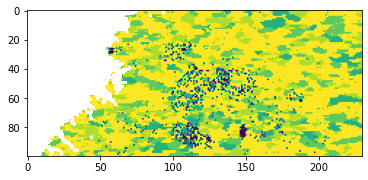

In [11]:
tprogs_dir = os.path.dirname(gwfm_dir)+'/Large_TPROGS_run/TPROGS_realizations_final/'
# get all file names
tprogs_line_files = glob.glob(tprogs_dir+'*')
tprogs_og = tprogs_chk(tprogs_line_files[0])

In [15]:
tprogs_dir = os.path.dirname(gwfm_dir)+'/Large_TPROGS_run/New_realizations/'
# get all file names
tprogs_line_files = glob.glob(tprogs_dir+'*quench*')
tprogs_new_quench4 = tprogs_chk(tprogs_line_files[0])

In [16]:
tprogs_dir = os.path.dirname(gwfm_dir)+'/Large_TPROGS_run/New_realizations/'
# get all file names
tprogs_line_files = glob.glob(tprogs_dir+'*old*')
tprogs_new_noquench = tprogs_chk(tprogs_line_files[0])

In [17]:
tprogs_dir = os.path.dirname(gwfm_dir)+'/Large_TPROGS_run/TPROGS_10/tsim/'
# get all file names
tprogs_line_files = glob.glob(tprogs_dir+'*')
tprogs_new_quench = tprogs_chk(tprogs_line_files[0])

In [19]:
og_hist = np.histogram(np.where(tprogs_og<0, tprogs_og*-1, tprogs_og), bins=[1,2,3,4,5])[0]/(230*320*100)
new_hist = np.histogram(tprogs_new_quench, bins=[1,2,3,4,5])[0]/(230*320*100)
noquench_hist = np.histogram(tprogs_new_noquench, bins=[1,2,3,4,5])[0]/(230*320*100)
quench4_hist = np.histogram(tprogs_new_quench4, bins=[1,2,3,4,5])[0]/(230*320*100)

print('Original ', og_hist, np.sum(og_hist))
print('New data quench', new_hist, np.sum(new_hist))
print('New data No quench',  noquench_hist, np.sum(noquench_hist))
print('New data quench 4',  quench4_hist, np.sum(quench4_hist))

Original  [0.05745625 0.20355815 0.15383288 0.58515272] 1.0
New data quench [0.05754185 0.20342432 0.15399022 0.58504361] 1.0
New data No quench [0.04998125 0.20481576 0.16562133 0.57958166] 1.0
New data quench 4 [0.05568967 0.20281957 0.15957935 0.58191141] 1.0


In [24]:
im?

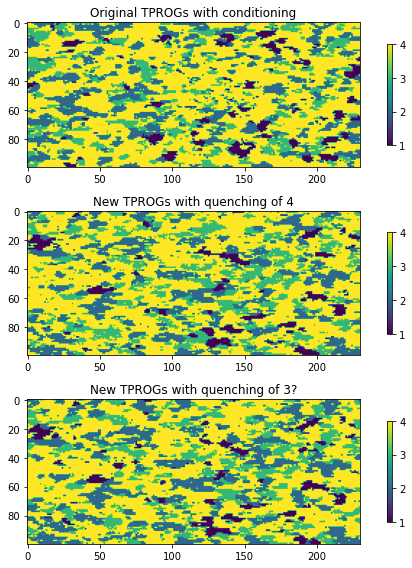

In [36]:
fig,ax=plt.subplots(3,1,figsize=(8,8))
layer = 200

im = ax[0].imshow(np.where(tprogs_og<0, tprogs_og*-1, tprogs_og)[layer,:,:])
plt.colorbar(im, shrink=0.7,ax=ax[0])
ax[0].set_title('Original TPROGs with conditioning')

ax[1].imshow(tprogs_new_quench4[layer,:,:])
plt.colorbar(im, shrink=0.7,ax=ax[1])
ax[1].set_title('New TPROGs with quenching of 4')


ax[2].imshow(tprogs_new_quench[layer,:,:])
plt.colorbar(im, shrink=0.7,ax=ax[2])
ax[2].set_title('New TPROGs with quenching of 3?')

# ax[3].imshow(tprogs_new_noquench[0,:,:])
# plt.colorbar(im, shrink=0.7,ax=ax[3])
# ax[3].set_title('New TPROGs with quenching removed')


fig.tight_layout()

In [36]:

# # the bottom layer of the tprogs model is at -50 m amsl and the top layer is 50 m amsl
# t = 0
# for k in np.arange(-80,80,0.5):
#     tprogs_elev[t,dem_data<k]= np.NaN
#     t+=1
# masked_tprogs = ma.masked_invalid(tprogs_elev)